In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/Final/data/'

In [3]:
sample = pd.read_csv(path + 'sample.csv')
test = pd.read_csv(path + 'test.csv', sep=';')
train = pd.read_csv(path + 'train.csv', sep=';')

In [4]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,66.1 bhp,90Nm@ 3500rpm,5.0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,84 bhp,114Nm@ 3500rpm,5.0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Data Preprocessing

In [5]:
#train.drop_duplicates(inplace=True)

In [6]:
for i in [train, test]:
    i['brand'] = i.name.str.split(n=1, expand=True)[0]

for i in [train, test]:
    i['brand_extend'] = i.name.str.split(n=2, expand=True)[0] +' ' + i.name.str.split(n=2, expand=True)[1]

for i in [train, test]:
    i['n_mileage'] = i.mileage.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_engine'] = i.engine.str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['n_max_power'] = (i.max_power.str.split(pat='b', n=1, expand=True)[0]).str.split(n=1, expand=True)[0].astype('float64')

for i in [train, test]:
    i['torque_nm'] = (((((i.torque.str.split(pat='N', n=1, expand=True)[0]).str.split(pat='n', n=1, expand=True)[0]).str.split(pat='@', n=1, expand=True)[0]).str.split(pat='k', n=1, expand=True)[0]).str.split(n=1, expand=True)[0]).str.split(pat='(', n=1, expand=True)[0].astype('float64')

In [7]:
for i in [train, test]:
    i['n_owner'] = i['owner'].copy()
    i['n_owner'].replace(to_replace='First Owner', value=1, inplace=True)
    i['n_owner'].replace(to_replace='Second Owner', value=2, inplace=True)
    i['n_owner'].replace(to_replace='Third Owner', value=3, inplace=True)
    i['n_owner'].replace(to_replace='Fourth & Above Owner', value=4, inplace=True)
    i['n_owner'].replace(to_replace='Test Drive Car', value=0, inplace=True)

C:\Users\khoat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


year                AxesSubplot(0.125,0.536818;0.133621x0.343182)
selling_price    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
km_driven         AxesSubplot(0.44569,0.536818;0.133621x0.343182)
seats            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
n_mileage        AxesSubplot(0.766379,0.536818;0.133621x0.343182)
n_engine               AxesSubplot(0.125,0.125;0.133621x0.343182)
n_max_power         AxesSubplot(0.285345,0.125;0.133621x0.343182)
torque_nm            AxesSubplot(0.44569,0.125;0.133621x0.343182)
n_owner             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

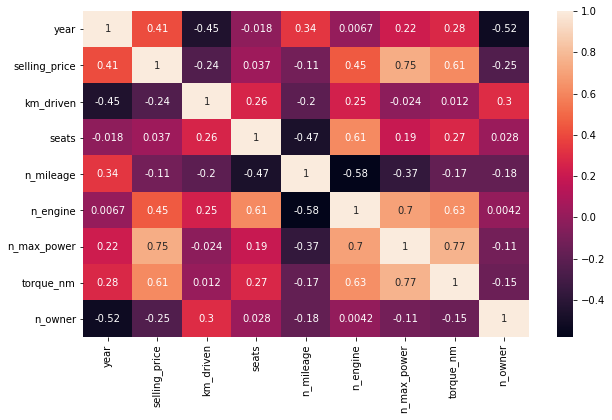

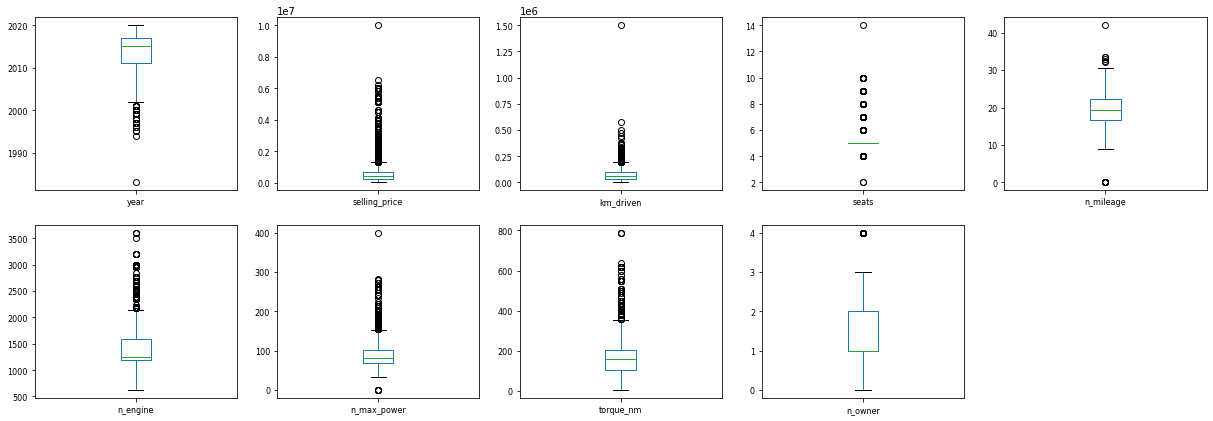

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True)

fig = plt.figure(figsize = (21,7))
ax = fig.gca()
train.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False, fontsize=8, ax=ax)

In [9]:
#train = train[train['selling_price'] < 9000000]

In [10]:
#train = pd.concat([train, pd.get_dummies(train.brand, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.fuel, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.transmission, drop_first=True)], axis=1)
train = pd.concat([train, pd.get_dummies(train.seller_type, drop_first=True)], axis=1)

#test = pd.concat([test, pd.get_dummies(test.brand, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.fuel, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.transmission, drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test.seller_type, drop_first=True)], axis=1)

In [11]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [12]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,1582.0,126.20,259.90,2,1,0,0,1,1,0


<AxesSubplot:title={'center':'selling_price'}, xlabel='owner'>

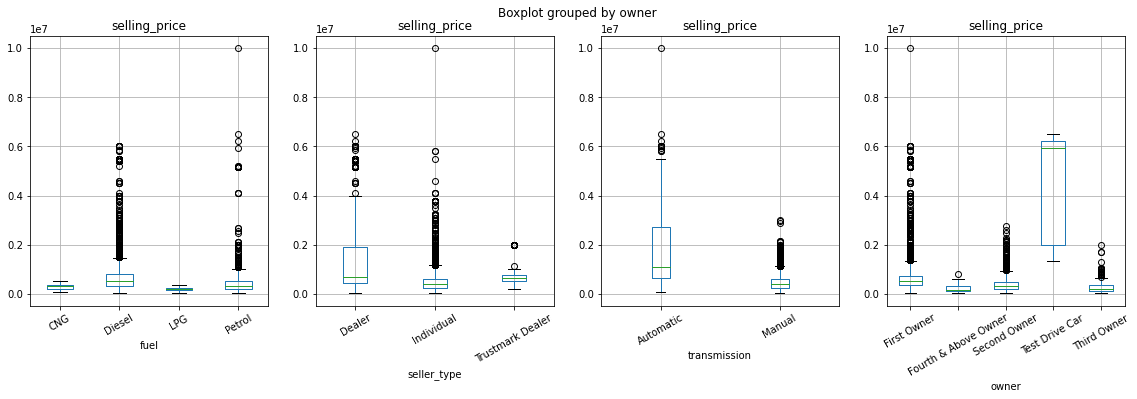

In [13]:
fig, axes = plt.subplots(1,4, figsize=(19,5))
train.boxplot(column='selling_price', by='fuel', rot=30, ax=axes[0])
train.boxplot(column='selling_price', by='seller_type', rot=30, ax=axes[1])
train.boxplot(column='selling_price', by='transmission', rot=30, ax=axes[2])
train.boxplot(column='selling_price', by='owner', rot=30, ax=axes[3])

<AxesSubplot:title={'center':'selling_price'}, xlabel='brand'>

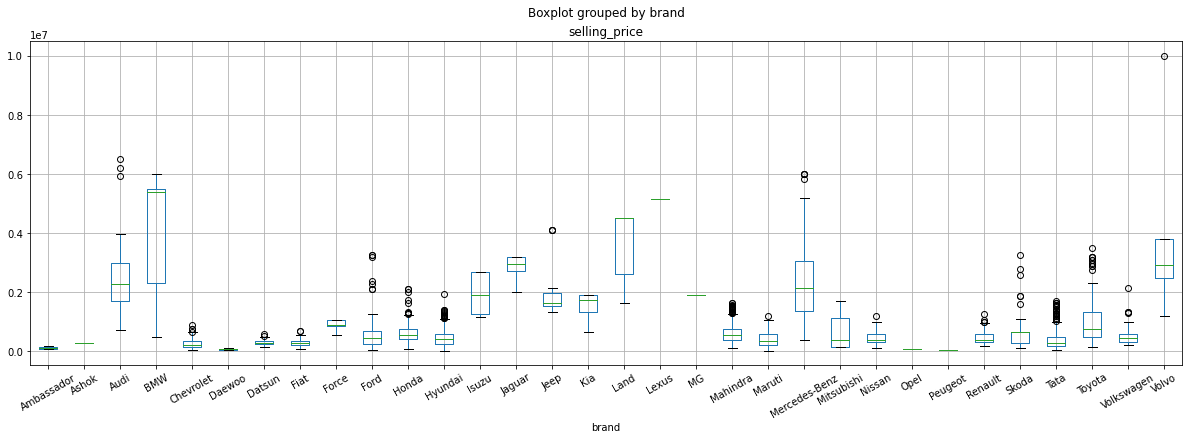

In [14]:
train.boxplot(column='selling_price', by='brand', figsize=(20,6), rot=30)

In [15]:
for i in [train, test]:
    i.fillna(i.mean(),inplace=True)

In [16]:
test[test.mileage.isna()]

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
22,23,Hyundai Santro Xing XG AT eRLX Euro II,2004,90000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,2,0,0,1,0,1,0
39,40,Fiat Punto 1.3 Emotion,2013,160254,Diesel,Dealer,Manual,Second Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,2,1,0,0,1,0,0
71,72,Ford Figo Aspire Facelift,2017,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,1,1,0,0,1,1,0
121,122,Hyundai Santro GLS I - Euro II,2006,100000,Petrol,Individual,Manual,Second Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,2,0,0,1,1,1,0
132,133,Hyundai Santro Xing XG AT eRLX Euro II,2006,100000,Petrol,Individual,Automatic,Second Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1919,Maruti Omni E 8 Str STD,2009,140000,Petrol,Individual,Manual,First Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,1,0,0,1,1,1,0
1967,1968,Maruti Swift 1.3 VXi,2006,100000,Petrol,Individual,Manual,Second Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,2,0,0,1,1,1,0
1992,1993,Maruti Swift VDI BSIV,2008,90000,Diesel,Individual,Manual,Third Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,3,1,0,0,1,1,0
2011,2012,Tata Indica DLS,2006,77000,Diesel,Individual,Manual,First Owner,NaN,NaN,...,1442.419652,91.327673,165.436815,1,1,0,0,1,1,0


In [17]:
train[train.mileage.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
14,Maruti Swift 1.3 LXI,2005,85000,100000,Petrol,Individual,Manual,First Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,1,0,0,1,1,1,0
106,Hyundai Santro GS zipPlus,2001,60000,71000,Petrol,Individual,Manual,Second Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,2,0,0,1,1,1,0
113,Toyota Etios Liva G,2012,350000,40000,Petrol,Individual,Manual,Third Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,3,0,0,1,1,1,0
142,Toyota Etios Liva GD,2012,275000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,2,1,0,0,1,1,0
149,Maruti Zen Estilo VXI BSIV W ABS,2011,200000,40000,Petrol,Individual,Manual,First Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5704,Hyundai Santro Xing XS eRLX Euro III,2006,80000,118000,Petrol,Individual,Manual,First Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,1,0,0,1,1,1,0
5810,Maruti Swift VDI BSIV,2008,229999,50000,Diesel,Individual,Manual,Third Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,3,1,0,0,1,1,0
5881,Maruti Swift 1.3 VXi,2006,140000,65000,Petrol,Individual,Manual,Third Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,3,0,0,1,1,1,0
5903,Maruti Esteem Vxi - BSII,2005,50000,60000,Petrol,Individual,Manual,Third Owner,NaN,NaN,...,1464.356959,91.585197,169.304969,3,0,0,1,1,1,0


# Build model

In [18]:
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,...,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,...,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,...,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,...,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,...,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Maruti A-Star Lxi,2010,235000,50000,Petrol,Individual,Manual,First Owner,19.0 kmpl,998 CC,...,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,Maruti Wagon R LXI CNG,2018,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,...,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,Tata Tigor 1.2 Revotron XT,2018,450000,75000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1199 CC,...,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,Mahindra Bolero 2011-2019 DI NON AC BS III White,2011,250000,100000,Diesel,Individual,Manual,Second Owner,15.96 kmpl,2523 CC,...,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [19]:
test

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,...,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,...,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,...,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,...,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,...,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2124,Hyundai Grand i10 Nios Sportz,2020,2000,Petrol,Dealer,Manual,First Owner,20.7 kmpl,1197 CC,...,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2125,Maruti Swift Dzire VDI,2018,100000,Diesel,Individual,Manual,Second Owner,28.4 kmpl,1248 CC,...,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2126,Tata Indica V2 DLE BSIII,2011,172000,Diesel,Individual,Manual,Second Owner,17.88 kmpl,1396 CC,...,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2127,Hyundai Creta 1.6 CRDi SX,2017,47000,Diesel,Individual,Manual,Second Owner,19.67 kmpl,1582 CC,...,1582.0,126.20,259.90,2,1,0,0,1,1,0


In [20]:
x = train.drop(['name','fuel','selling_price','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)
y = train['selling_price']

In [21]:
x

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2018,9500,5.0,1497.0,108.50,260.00,1,1,0,0,1,1,0
1,2018,30000,5.0,1396.0,88.76,219.66,1,1,0,0,1,1,0
2,2015,80000,7.0,2982.0,168.50,360.00,2,1,0,0,0,1,0
3,2015,35000,5.0,1591.0,121.30,154.90,1,0,0,1,1,1,0
4,2019,20000,5.0,1969.0,190.00,400.00,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2010,50000,5.0,998.0,66.10,90.00,1,0,0,1,1,1,0
5996,2018,40000,5.0,998.0,58.16,77.00,1,0,0,0,1,1,0
5997,2018,75000,5.0,1199.0,84.00,114.00,1,0,0,1,1,1,0
5998,2011,100000,9.0,2523.0,63.00,180.00,2,1,0,0,1,1,0


In [22]:
x_test = test.drop(['Id','name','fuel','seller_type','transmission','owner','mileage','engine','max_power','torque','brand','brand_extend','n_mileage'], axis=1)

In [23]:
x_test

,year,km_driven,seats,n_engine,n_max_power,torque_nm,n_owner,Diesel,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,2016,11000,5.0,1598.0,103.50,153.00,1,0,0,1,0,0,0
1,2017,35000,5.0,1497.0,117.30,145.00,1,0,0,1,1,1,0
2,2014,80000,5.0,1197.0,82.00,114.00,1,0,0,1,1,1,0
3,2014,145241,7.0,2179.0,120.00,290.00,1,1,0,0,1,1,0
4,2015,92651,5.0,1498.0,98.96,215.00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2020,2000,5.0,1197.0,81.86,113.75,1,0,0,1,1,0,0
2124,2018,100000,5.0,1248.0,74.02,190.00,2,1,0,0,1,1,0
2125,2011,172000,5.0,1396.0,52.80,85.00,2,1,0,0,1,1,0
2126,2017,47000,5.0,1582.0,126.20,259.90,2,1,0,0,1,1,0


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

result = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(20,31):
    extra_tree = RandomForestRegressor(random_state=42, max_depth=i, n_estimators=50)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result = result.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result.sort_values(by='Val_RMSE')

In [43]:
result1 = pd.DataFrame(columns=['max_depth', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(10,20):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=i, n_estimators=80)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result1 = result1.append(pd.Series({'max_depth': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result1.sort_values(by='Val_RMSE')

,max_depth,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
1,11.0,75680.348619,0.991218,120250.183147,0.977554
3,13.0,56069.013613,0.995180,122308.866602,0.976779
2,12.0,65957.718629,0.993329,122873.309418,0.976564
5,15.0,41452.410059,0.997365,124100.045675,0.976094
7,17.0,30481.225347,0.998575,124645.823703,0.975883
6,16.0,35280.074838,0.998091,125446.407467,0.975572
9,19.0,23313.847815,0.999167,126640.849914,0.975105
4,14.0,48474.628309,0.996397,127293.216940,0.974847
8,18.0,26465.837864,0.998926,129379.508295,0.974016
0,10.0,89463.833295,0.987727,133541.123050,0.972318


In [44]:
result2 = pd.DataFrame(columns=['n_es', 'Train_RMSE', 'Train_R^2', 'Val_RMSE', 'Val_R^2'])

for i in range(40,111):
    extra_tree = ExtraTreesRegressor(random_state=42, max_depth=11, n_estimators=i)
    extra_tree.fit(x_train,y_train)

    train_pred = extra_tree.predict(x_train)
    val_pred = extra_tree.predict(x_val)

    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_r2 = metrics.r2_score(y_train, train_pred)
    val_rmse = np.sqrt(metrics.mean_squared_error(y_val, val_pred))
    val_r2 = metrics.r2_score(y_val, val_pred)

    result2 = result2.append(pd.Series({'n_es': i, 'Train_RMSE':train_rmse, 'Train_R^2':train_r2, 'Val_RMSE':val_rmse, 'Val_R^2':val_r2}), ignore_index=True)

result2.sort_values(by='Val_RMSE')

,n_es,Train_RMSE,Train_R^2,Val_RMSE,Val_R^2
22,62.0,75818.361741,0.991186,117584.424166,0.978538
23,63.0,75888.728713,0.991169,117605.883343,0.978530
21,61.0,75886.039719,0.991170,117727.060997,0.978486
24,64.0,75988.642676,0.991146,117802.391967,0.978458
17,57.0,75952.996730,0.991154,117887.448681,0.978427
...,...,...,...,...,...
55,95.0,75890.798879,0.991169,119591.460743,0.977799
42,82.0,75670.864349,0.991220,119671.463543,0.977769
41,81.0,75644.961714,0.991226,119983.384965,0.977653
39,79.0,75675.261087,0.991219,119985.358551,0.977653


In [45]:
extra_tree = ExtraTreesRegressor(random_state=42, max_depth=11, n_estimators=62)
extra_tree.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=11, n_estimators=62, random_state=42)

In [46]:
train_pred = extra_tree.predict(x_train)
val_pred = extra_tree.predict(x_val)

In [47]:
print('Train set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R^2 :', metrics.r2_score(y_train, train_pred))
print('')
print('Validation set:')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))
print('R^2 :', metrics.r2_score(y_val, val_pred))

Train set:
RMSE: 75818.36174066995
R^2 : 0.9911855619228511

Validation set:
RMSE: 117584.42416587117
R^2 : 0.9785379528805607


In [48]:
test_pred = extra_tree.predict(x_test)

In [49]:
submit = sample.copy()

In [50]:
submit.Predicted = test_pred

In [51]:
submit

,Id,Predicted
0,1,651921.510633
1,2,837879.499489
2,3,412204.142613
3,4,618922.055247
4,5,566531.589222
...,...,...
2123,2124,639643.929184
2124,2125,667681.909805
2125,2126,202704.341577
2126,2127,898144.497217


In [52]:
#submit.to_csv(path_or_buf= path + 'submit_13_12_2.csv', index=False)